In [1]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Read the file into a variable fifa_data
filepath = "/home/ryan/stark/MachineHack/Food_QUalityA_ParticipantsData/Data_Train.xlsx"
data = pd.read_excel(filepath)


In [3]:
testdata = pd.read_excel('/home/ryan/stark/MachineHack/Food_QUalityA_ParticipantsData/Data_Test.xlsx')


In [4]:
data.head()

,ID,Date,LicenseNo,FacilityID,FacilityName,Type,Street,City,State,LocationID,Reason,SectionViolations,RiskLevel,Geo_Loc,Inspection_Results
0,31103489027986,26-04-2010,4744,8123,7715,RESTAURANT,15522,id-11235901,id_1890134,81876.0,CANVASS,33.0,High,locid16406,4
1,10088999935915,21-06-2009,2973,12268,11664,GROCERY STORE,3057,id-11235901,id_1890134,81862.0,COMPLAINT,33.0,High,locid878,4
2,40148966010272,01-05-2013,18223,1112,969,RESTAURANT,14988,id-11235901,id_1890134,81883.0,CANVASS,NaN,High,locid3368,6
3,37157708563676,28-09-2015,20825,20007,19115,RESTAURANT,3661,id-11235901,id_1890134,81859.0,CANVASS RE-INSPECTION,31.0,Medium,locid11839,4
4,47478049564374,09-12-2015,2136,16867,10409,RESTAURANT,7876,id-11235901,id_1890134,81886.0,COMPLAINT,30.0,High,locid12264,4


In [5]:
from datetime import datetime
data['Date'] = pd.to_datetime(data['Date'] ,errors='coerce')

In [6]:
data['Geo_Loc'] = data['Geo_Loc'].str.replace(r'\D', '')

In [7]:
data['Geo_Loc'] = pd.to_numeric(data['Geo_Loc'], errors='coerce') 


In [8]:
data['Geo_Loc'].dtype

dtype('int64')

In [9]:
data['Geo_Loc'].head()

0    16406
1      878
2     3368
3    11839
4    12264
Name: Geo_Loc, dtype: int64

In [10]:
#tackling date
data['Date'] = pd.to_datetime(data['Date'] ,errors='coerce')

In [11]:
#creating features out of date
data = data.assign(hour=data.Date.dt.hour,
               day=data.Date.dt.day,
               month=data.Date.dt.month,
               year=data.Date.dt.year)

In [12]:
total = data.isnull().sum().sort_values(ascending=False)
percent_1 = data.isnull().sum()/data.isnull().count()*100
percent_2 = (np.round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%']) #ptr
missing_data


,Total,%
SectionViolations,39068,26.5
Type,3485,2.4
year,53,0.0
day,53,0.0
hour,53,0.0
Date,53,0.0
month,53,0.0
LocationID,35,0.0
Reason,0,0.0
RiskLevel,0,0.0


In [14]:
# #filling with meadian 
# data['']

In [15]:
len(data['Type'].unique())
#data['LocationID'].value_counts()

410

In [16]:
data.SectionViolations = data.SectionViolations.fillna(method = 'backfill')

In [17]:
data.Type = data.Type.fillna(method = 'backfill')

In [18]:
data.hour = data.hour.fillna(method = 'backfill')

In [19]:
data.day = data.day.fillna(method = 'backfill')

In [20]:
data.month = data.month.fillna(method = 'backfill')

In [21]:
data.year = data.year.fillna(method = 'backfill')

In [22]:
data.LocationID = data.LocationID.fillna(method = 'backfill')

In [23]:
total = data.isnull().sum().sort_values(ascending=False)
percent_1 = data.isnull().sum()/data.isnull().count()*100
percent_2 = (np.round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%']) #ptr
missing_data


,Total,%
Date,53,0.0
year,0,0.0
State,0,0.0
LicenseNo,0,0.0
FacilityID,0,0.0
FacilityName,0,0.0
Type,0,0.0
Street,0,0.0
City,0,0.0
LocationID,0,0.0


In [24]:
df = data.copy()

In [25]:
df =df.drop(['Date','ID'], axis =1)

In [26]:
cat_features = ['SectionViolations','RiskLevel','Reason']

In [27]:
import itertools

In [28]:
interactions = pd.DataFrame(index=df.index)
interactions

""
0
1
2
3
4
...
147438
147439
147440
147441


In [29]:
for col1 ,col2 in  itertools.combinations(cat_features,2):
    
    newcolname = col1 + "_" + col2 
    new_values = df[col1].map(str) + "_" + df[col2].map(str)
    interactions[newcolname] = new_values


In [30]:
df = df.join(interactions)


In [31]:
sf = df.copy()

In [32]:
sf = sf.drop(['hour'],axis =1)

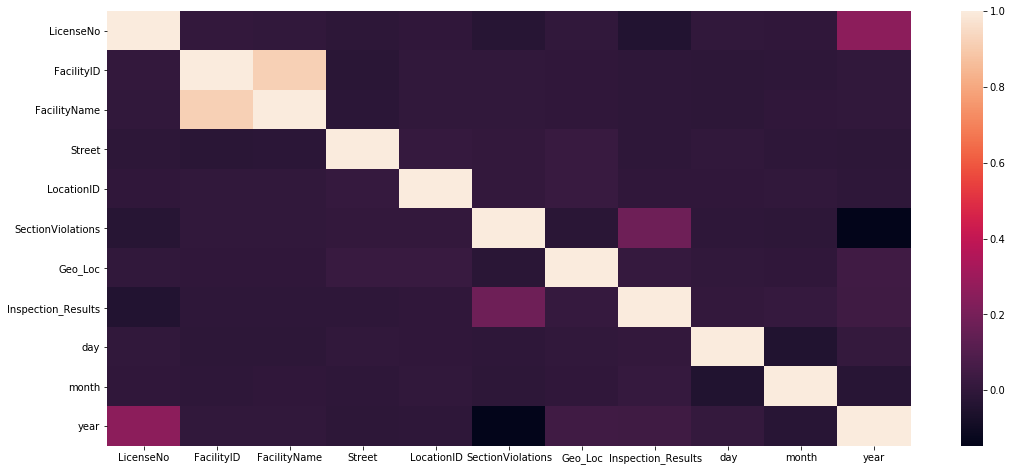

In [33]:
plt.figure(figsize=(18,8))

sns.heatmap(sf.corr())


In [34]:
####creating new features

In [35]:
cat_features2 = ['State','City','Street','LocationID','Geo_Loc']
interactions2 = pd.DataFrame(index=df.index)
interactions2

""
0
1
2
3
4
...
147438
147439
147440
147441


In [36]:
for col1 ,col2 in  itertools.combinations(cat_features2,2):
    
    newcolname = col1 + "_" + col2 
    new_values = df[col1].map(str) + "_" + df[col2].map(str)
    interactions2[newcolname] = new_values


In [37]:
df = df.join(interactions2)
df.head()

,LicenseNo,FacilityID,FacilityName,Type,Street,City,State,LocationID,Reason,SectionViolations,...,State_City,State_Street,State_LocationID,State_Geo_Loc,City_Street,City_LocationID,City_Geo_Loc,Street_LocationID,Street_Geo_Loc,LocationID_Geo_Loc
0,4744,8123,7715,RESTAURANT,15522,id-11235901,id_1890134,81876.0,CANVASS,33.0,...,id_1890134_id-11235901,id_1890134_15522,id_1890134_81876.0,id_1890134_16406,id-11235901_15522,id-11235901_81876.0,id-11235901_16406,15522_81876.0,15522_16406,81876.0_16406
1,2973,12268,11664,GROCERY STORE,3057,id-11235901,id_1890134,81862.0,COMPLAINT,33.0,...,id_1890134_id-11235901,id_1890134_3057,id_1890134_81862.0,id_1890134_878,id-11235901_3057,id-11235901_81862.0,id-11235901_878,3057_81862.0,3057_878,81862.0_878
2,18223,1112,969,RESTAURANT,14988,id-11235901,id_1890134,81883.0,CANVASS,31.0,...,id_1890134_id-11235901,id_1890134_14988,id_1890134_81883.0,id_1890134_3368,id-11235901_14988,id-11235901_81883.0,id-11235901_3368,14988_81883.0,14988_3368,81883.0_3368
3,20825,20007,19115,RESTAURANT,3661,id-11235901,id_1890134,81859.0,CANVASS RE-INSPECTION,31.0,...,id_1890134_id-11235901,id_1890134_3661,id_1890134_81859.0,id_1890134_11839,id-11235901_3661,id-11235901_81859.0,id-11235901_11839,3661_81859.0,3661_11839,81859.0_11839
4,2136,16867,10409,RESTAURANT,7876,id-11235901,id_1890134,81886.0,COMPLAINT,30.0,...,id_1890134_id-11235901,id_1890134_7876,id_1890134_81886.0,id_1890134_12264,id-11235901_7876,id-11235901_81886.0,id-11235901_12264,7876_81886.0,7876_12264,81886.0_12264


In [38]:
sf = df.copy()
sf = sf.drop('hour',axis =1)

In [39]:
sf.dtypes

LicenseNo                        int64
FacilityID                       int64
FacilityName                     int64
Type                            object
Street                           int64
City                            object
State                           object
LocationID                     float64
Reason                          object
SectionViolations              float64
RiskLevel                       object
Geo_Loc                          int64
Inspection_Results               int64
day                            float64
month                          float64
year                           float64
SectionViolations_RiskLevel     object
SectionViolations_Reason        object
RiskLevel_Reason                object
State_City                      object
State_Street                    object
State_LocationID                object
State_Geo_Loc                   object
City_Street                     object
City_LocationID                 object
City_Geo_Loc             

In [40]:
from sklearn.model_selection import train_test_split
y = data.Inspection_Results
X = sf.drop(['Inspection_Results'], axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.80, test_size=0.20,random_state=0)

In [41]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import log_loss
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report
    
# Function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestClassifier(random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    target_names = ['class 0', 'class 1', 'class 2','class 3', 'class 4', 'class 5', 'class 6']
    print(classification_report(y_valid, preds, target_names=target_names,labels= [0,1,2,3,4,5,6]))
    return model.score(X_valid,y_valid) 

In [42]:
categorical_cols = [cname for cname in X.columns if X[cname].nunique() < 500000000 and 
                        X[cname].dtype == "object"]

In [43]:
categorical_cols

['Type',
 'City',
 'State',
 'Reason',
 'RiskLevel',
 'SectionViolations_RiskLevel',
 'SectionViolations_Reason',
 'RiskLevel_Reason',
 'State_City',
 'State_Street',
 'State_LocationID',
 'State_Geo_Loc',
 'City_Street',
 'City_LocationID',
 'City_Geo_Loc',
 'Street_LocationID',
 'Street_Geo_Loc',
 'LocationID_Geo_Loc']

In [44]:
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]


In [45]:
numerical_cols

['LicenseNo',
 'FacilityID',
 'FacilityName',
 'Street',
 'LocationID',
 'SectionViolations',
 'Geo_Loc',
 'day',
 'month',
 'year']

In [46]:
X_train.dtypes

LicenseNo                        int64
FacilityID                       int64
FacilityName                     int64
Type                            object
Street                           int64
City                            object
State                           object
LocationID                     float64
Reason                          object
SectionViolations              float64
RiskLevel                       object
Geo_Loc                          int64
day                            float64
month                          float64
year                           float64
SectionViolations_RiskLevel     object
SectionViolations_Reason        object
RiskLevel_Reason                object
State_City                      object
State_Street                    object
State_LocationID                object
State_Geo_Loc                   object
City_Street                     object
City_LocationID                 object
City_Geo_Loc                    object
Street_LocationID        

In [47]:
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Type', 'City', 'State', 'Reason', 'RiskLevel', 'SectionViolations_RiskLevel', 'SectionViolations_Reason', 'RiskLevel_Reason', 'State_City', 'State_Street', 'State_LocationID', 'State_Geo_Loc', 'City_Street', 'City_LocationID', 'City_Geo_Loc', 'Street_LocationID', 'Street_Geo_Loc', 'LocationID_Geo_Loc']


In [50]:
from sklearn.preprocessing import LabelEncoder

# Make copy to avoid changing original data 
label_X_train = X_train.copy()
label_X_valid = X_valid.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_X_train[col] = label_encoder.fit_transform(X_train[col])
    label_X_valid[col] = label_encoder.transform(X_valid[col])



ValueError: y contains previously unseen labels: 'WHOLESALE & RETAIL'

KeyboardInterrupt: 

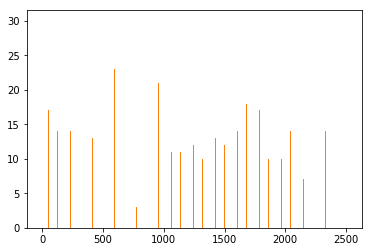

In [49]:
(data
 .groupby(['Date', 'Inspection_Results'])
 .size()
 .unstack()
 .plot.bar()
)

In [25]:
label_X_train = label_X_train.assign(hour=label_X_train.Date.dt.hour,
               day=label_X_train.Date.dt.day,
               month=label_X_train.Date.dt.month,
               year=label_X_train.Date.dt.year)

In [26]:
label_X_valid = label_X_valid.assign(hour=label_X_valid.Date.dt.hour,
               day=label_X_valid.Date.dt.day,
               month=label_X_valid.Date.dt.month,
               year=label_X_valid.Date.dt.year)

In [27]:
label_X_train = label_X_train.drop(['Date','ID'] , axis=1)

In [28]:
label_X_valid = label_X_valid.drop(['Date','ID' ], axis=1)

In [29]:
label_X_train.isnull().sum()

LicenseNo             0
FacilityID            0
FacilityName          0
Type                  0
Street                0
City                  0
State                 0
LocationID            0
Reason                0
SectionViolations     0
RiskLevel             0
Geo_Loc               0
hour                 53
day                  53
month                53
year                 53
dtype: int64

In [30]:
label_X_train.fillna(label_X_train.mean(), inplace=True)
label_X_valid.fillna(label_X_valid.mean(), inplace=True)


In [31]:
score_dataset(label_X_train, label_X_valid, y_train, y_valid)

              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00         0
     class 1       0.90      0.78      0.84        23
     class 2       0.00      0.00      0.00         0
     class 3       1.00      0.25      0.40         4
     class 4       0.91      0.97      0.94        86
     class 5       0.88      0.91      0.89        23
     class 6       0.83      0.83      0.83        12

   micro avg       0.90      0.90      0.90       148
   macro avg       0.65      0.53      0.56       148
weighted avg       0.90      0.90      0.89       148



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.8986486486486487

# Feature Engineering

In [32]:
lxt = label_X_train.copy()
lxv = label_X_valid.copy()

In [33]:
lxt

,LicenseNo,FacilityID,FacilityName,Type,Street,City,State,LocationID,Reason,SectionViolations,RiskLevel,Geo_Loc,hour,day,month,year
0,26121,7628,7252,326,8568,0,0,81846.0,6,32.0,0,7682,0.0,4.0,7.0,2015.0
1,36379,9294,8818,326,16553,0,0,81865.0,0,33.0,0,1912,0.0,19.0,9.0,2016.0
2,20219,4642,4429,351,7225,0,0,81897.0,0,21.0,0,1352,0.0,22.0,1.0,2017.0
3,0,10843,10274,64,2070,0,0,81853.0,2,3.0,0,5993,0.0,4.0,7.0,2015.0
4,3190,22923,21868,326,13077,0,0,81875.0,1,32.0,0,15316,0.0,21.0,4.0,2015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147290,10984,12219,11623,326,3887,0,0,81867.0,0,32.0,0,9498,0.0,27.0,9.0,2012.0
147291,23404,9401,8915,326,1173,0,0,81911.0,0,3.0,0,16551,0.0,2.0,7.0,2017.0
147292,17061,7663,7284,326,7518,0,0,81870.0,3,32.0,0,14718,0.0,3.0,5.0,2012.0
147293,4757,6345,6079,326,13253,0,0,81886.0,1,32.0,0,12351,0.0,18.0,2.0,2009.0


In [39]:
interactions = (lxt['Reason']) + "_" + (lxt['RiskLevel'])
print(interactions)

TypeError: ufunc 'add' did not contain a loop with signature matching types dtype('<U21') dtype('<U21') dtype('<U21')